<h1 align="center";style="color:blue"> Hepatitis Disease </h1>

**Dataset-Link:**https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

**Attributes 1 to 4 refer to the data of the patient:**
1) X (Patient ID/No.)

2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

3) Age (in years)

4) Sex (f,m)

**Attributes 5 to 14 refer to laboratory data:**

5) ALB

6) ALP

7) ALT

8) AST

9) BIL

10) CHE

11) CHOL

12) CREA

13) GGT

14) PROT

## Import

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Data Loading

In [15]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [18]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


**Checking missing values**

In [19]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [22]:
df.shape

(589, 13)

**Checking corr**

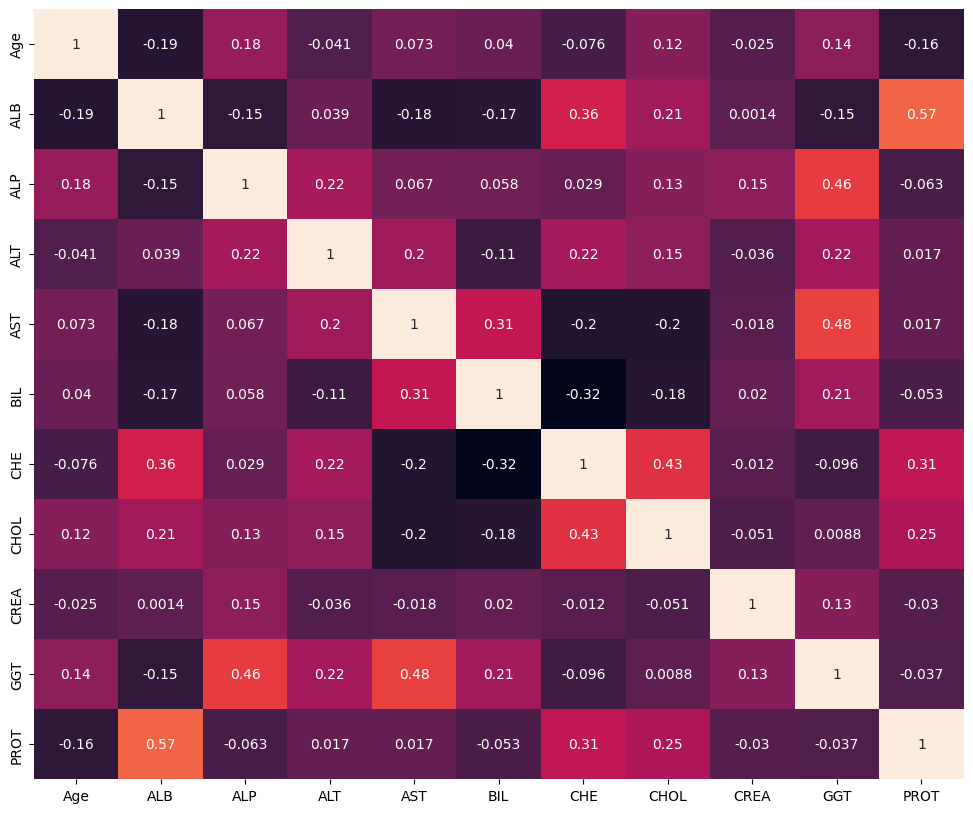

In [23]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cbar=False);


**Checking Outliers**

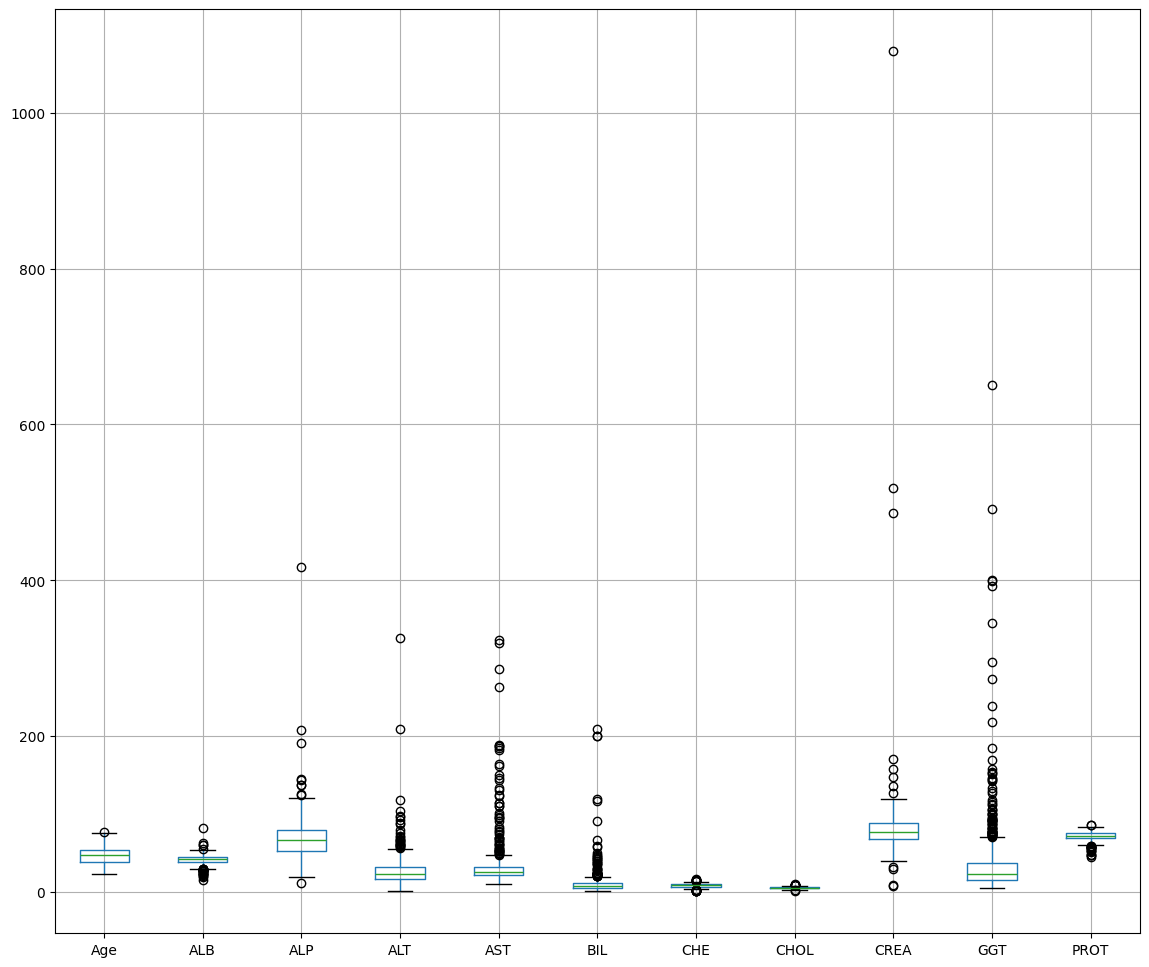

In [24]:
df.boxplot(figsize=(14,12));

## Data Preprocessing

**Encoding**

In [25]:
df['Sex'].unique()

array(['m', 'f'], dtype=object)

In [26]:
df.Sex.replace({'m':1,'f':0}, inplace=True)

In [27]:
df.Sex.unique()

array([1, 0], dtype=int64)

In [28]:
df.Category.value_counts(normalize=True)

Category
0=Blood Donor             0.893039
3=Cirrhosis               0.040747
1=Hepatitis               0.033956
2=Fibrosis                0.020374
0s=suspect Blood Donor    0.011885
Name: proportion, dtype: float64

In [29]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [30]:
df.Category.replace({'0=Blood Donor':0,'0s=suspect Blood Donor':0,'1=Hepatitis':1,'2=Fibrosis':2,'3=Cirrhosis':3},
                    inplace=True)
df.Category.unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


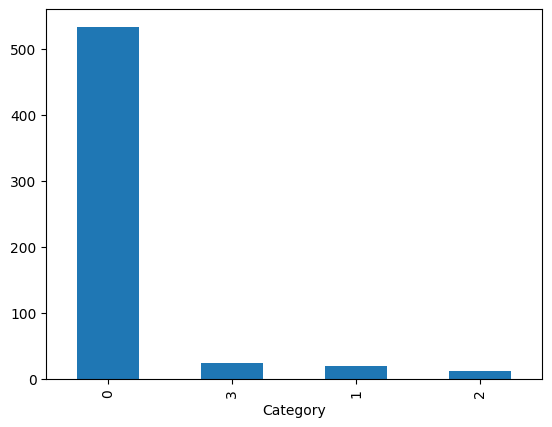

In [32]:
df.Category.value_counts().plot(kind="bar");

### Handling outliers

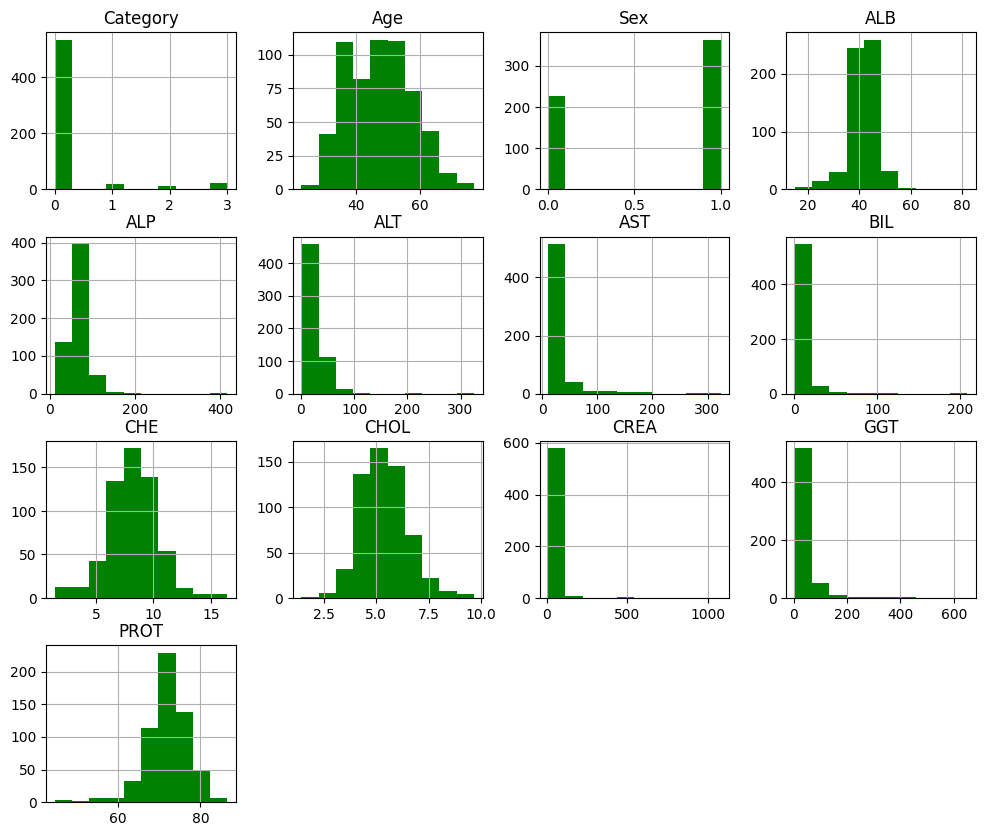

In [33]:
df.hist(figsize=(12,10),color="green");

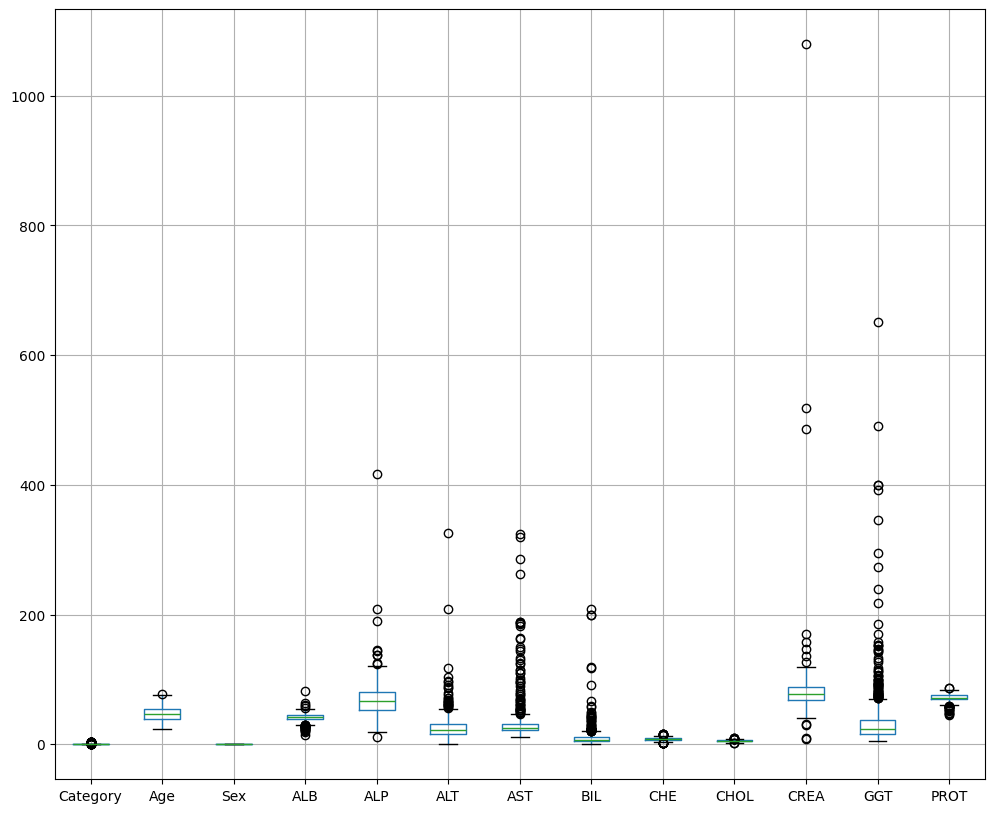

In [34]:
df.boxplot(figsize=(12,10));

In [35]:
def Boundary_skew(feature, name):
    
    '''
    We use below method if feature is a skewed
    
    '''

    IQR = feature.quantile(0.75)-feature.quantile(0.25)
    
    lower_bridge=feature.quantile(0.25)-(IQR*1.5)
    upper_bridge=feature.quantile(0.75)+(IQR*1.5)
    
    print(name), print(lower_bridge), print(upper_bridge), print(10*'-')

In [36]:
Boundary_skew(df.ALP, "ALP")
Boundary_skew(df.ALT, "ALT")
Boundary_skew(df.AST, "AST")
Boundary_skew(df.BIL, "BIL")
Boundary_skew(df.CREA, "CREA")
Boundary_skew(df.GGT, "GGT")

ALP
11.399999999999991
121.00000000000001
----------
ALT
-6.850000000000001
55.15
----------
AST
6.200000000000001
47.0
----------
BIL
-3.499999999999999
19.7
----------
CREA
36.5
120.5
----------
GGT
-17.4
70.6
----------


In [37]:
df.loc[df['ALP']>=110, "ALP"]=110
df.loc[df.ALT>=55, "ALT"]=55
df.loc[df.AST>=47, "AST"]=47
df.loc[df.BIL>=19.7, "BIL"]=19.7
df.loc[df.CREA>=120.5, "CREA"]=120.5
df.loc[df.GGT>=70.6, "GGT"]=70.6

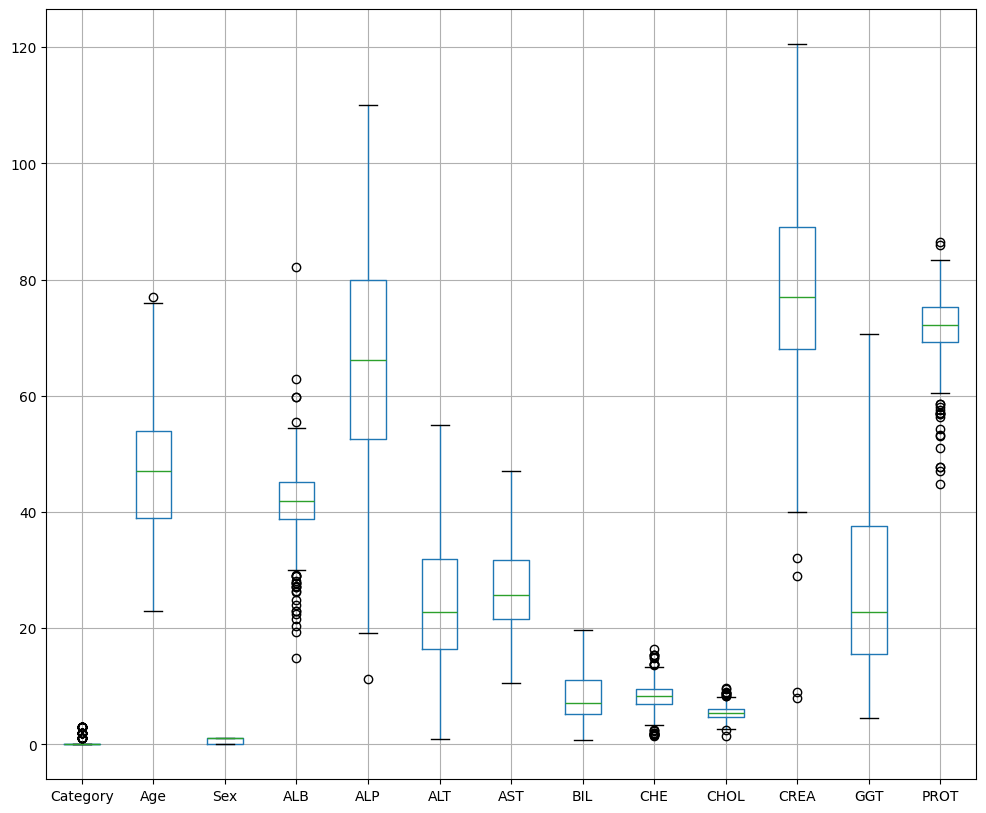

In [38]:
df.boxplot(figsize=(12,10));

In [39]:
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.196944,47.417657,0.616299,41.624278,66.934975,25.057046,27.840747,8.759083,8.203633,5.391341,78.513582,30.029372,71.890153
std,0.666439,9.931334,0.486700,5.761794,19.375775,12.458293,8.941355,4.954285,2.191073,1.128954,15.700909,19.639276,5.348883
min,0.000000,23.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,0.000000,47.000000,1.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,0.000000,54.000000,1.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,3.000000,77.000000,1.000000,82.200000,110.000000,55.000000,47.000000,19.700000,16.410000,9.670000,120.500000,70.600000,86.500000


### Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Category'],axis=1),df.Category ,test_size=0.2, random_state=0)

In [41]:
X_train.shape, y_test.shape

((471, 12), (118,))

## Train The Model

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [44]:
models = {"RandomForest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores 

{'RandomForest': 0.9576271186440678,
 'KNN': 0.9576271186440678,
 'SVC': 0.9576271186440678,
 'LogisticRegression': 0.9830508474576272}

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = model.predict(X_test)

**Checking the accuracy**

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.33      1.00      0.50         1
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         5

    accuracy                           0.98       118
   macro avg       0.83      0.88      0.79       118
weighted avg       0.99      0.98      0.98       118



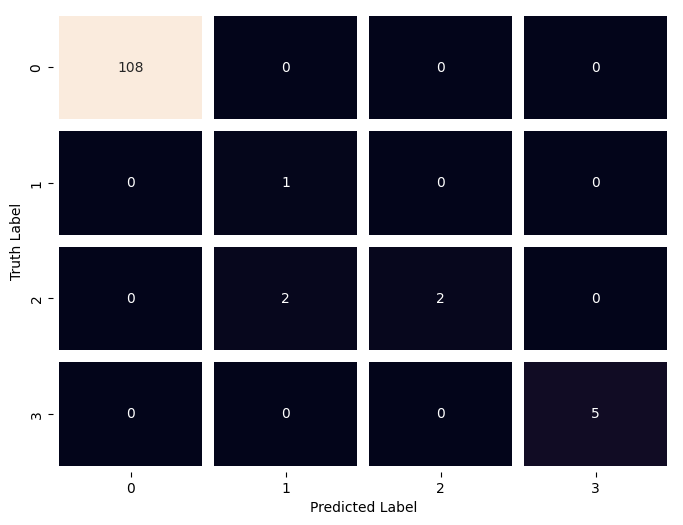

In [48]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

## Save The trained Model

In [49]:
import joblib
joblib.dump(model, 'hepatitis_model.pkl')

['hepatitis_model.pkl']